In [23]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
all_data = ride_data.merge(city_data, how='left', on='city')

# Display the data table for preview
all_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

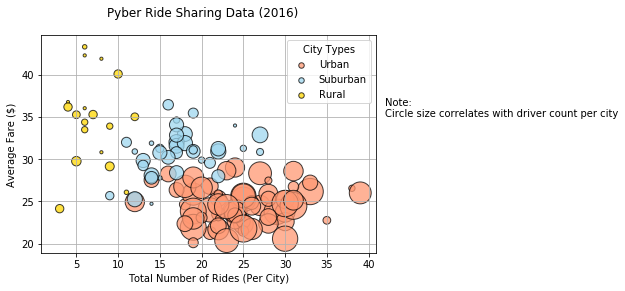

In [19]:
# Obtain the x and y coordinates for each of the three city types
coordinate_data = all_data[['city','type','fare','driver_count']]

city_data_drop_type = city_data.drop(columns=['type'])
city_data_drop_type

#urban data
urban_data = coordinate_data.loc[coordinate_data['type'] == 'Urban']
urban_data.head()

city_urban_group = urban_data.groupby(by='city')
city_urban_count = pd.DataFrame(city_urban_group['type'].count())
city_urban_count
city_urban_avg = pd.DataFrame(city_urban_group['fare'].mean())
city_urban_avg.head()

new_urban_data = city_urban_avg.merge(city_urban_count, how='left', on='city')
new_urban_data.head()

final_urban_data = new_urban_data.merge(city_data_drop_type, how='left', on='city')

final_urban_data = final_urban_data.rename(columns={'fare': 'Average Fare',
                                                   'type': 'Count of Rides',
                                                   'driver_count': 'Driver Count'})
final_urban_data.head()

urban_x = final_urban_data['Count of Rides']
urban_y = final_urban_data['Average Fare']
urban_bubble = final_urban_data['Driver Count']

#suburban data
suburban_data = coordinate_data.loc[coordinate_data['type'] == 'Suburban']
suburban_data.head()

city_suburban_group = suburban_data.groupby(by='city')
city_suburban_count = pd.DataFrame(city_suburban_group['type'].count())
city_suburban_count
city_suburban_avg = pd.DataFrame(city_suburban_group['fare'].mean())
city_suburban_avg.head()

new_suburban_data = city_suburban_avg.merge(city_suburban_count, how='left', on='city')
new_suburban_data.head()

final_suburban_data = new_suburban_data.merge(city_data_drop_type, how='left', on='city')

final_suburban_data = final_suburban_data.rename(columns={'fare': 'Average Fare',
                                                   'type': 'Count of Rides',
                                                   'driver_count': 'Driver Count'})
final_suburban_data.head()

suburban_x = final_suburban_data['Count of Rides']
suburban_y = final_suburban_data['Average Fare']
suburban_bubble = final_suburban_data['Driver Count']

#rural data
rural_data = coordinate_data.loc[coordinate_data['type'] == 'Rural']
rural_data.head()

city_rural_group = rural_data.groupby(by='city')
city_rural_count = pd.DataFrame(city_rural_group['type'].count())
city_rural_count
city_rural_avg = pd.DataFrame(city_rural_group['fare'].mean())
city_rural_avg.head()

new_rural_data = city_rural_avg.merge(city_rural_count, how='left', on='city')
new_rural_data.head()

final_rural_data = new_rural_data.merge(city_data_drop_type, how='left', on='city')

final_rural_data = final_rural_data.rename(columns={'fare': 'Average Fare',
                                                   'type': 'Count of Rides',
                                                   'driver_count': 'Driver Count'})
final_rural_data.head()

rural_x = final_rural_data['Count of Rides']
rural_y = final_rural_data['Average Fare']
rural_bubble = final_rural_data['Driver Count']

# Build the scatter plots for each city types

plt.scatter(urban_x, urban_y, marker="o", facecolors="#ff9873", edgecolors="black", alpha=0.75, s=urban_bubble*10)

plt.scatter(suburban_x, suburban_y, marker="o", facecolors="#9fd7ef", edgecolors="black", alpha=0.75, s=suburban_bubble*10)

plt.scatter(rural_x, rural_y, marker="o", facecolors="gold", edgecolors="black", alpha=0.75, s=rural_bubble*10)

legend_labels = ['Urban','Suburban','Rural']

lgnd = plt.legend(legend_labels, title='City Types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.suptitle('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()
plt.text(42,35,'Note:\nCircle size correlates with driver count per city')

plt.savefig('bubble-rides-fare-city-type.png', bbox_inches='tight')

plt.show()

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


## Total Fares by City Type

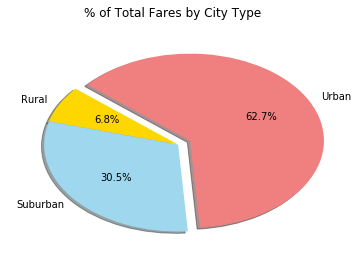

In [20]:
# Calculate Fare Percents
all_data.head()

type_fare_group = all_data.groupby('type')
fare_sum = pd.DataFrame(type_fare_group['fare'].sum())
fare_sum.head()


labels = fare_sum.index.values.tolist()
sizes = fare_sum['fare'].tolist()
colors = ["gold", "#9fd7ef", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.suptitle('% of Total Fares by City Type')

plt.savefig('pie-fares-city-type.png', bbox_inches='tight')

plt.show()

# Build Pie Chart

# Save Figure


## Total Rides by City Type

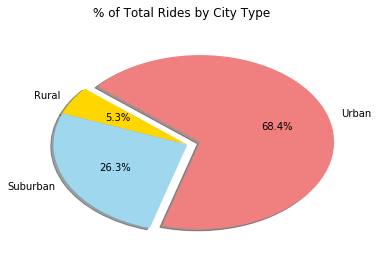

In [21]:
# Calculate Ride Percents
all_data.head()

type_ride_group = all_data.groupby('type')
ride_count = pd.DataFrame(type_ride_group['fare'].count())
ride_count.head()


ride_labels = ride_count.index.values.tolist()
ride_sizes = ride_count['fare'].tolist()
ride_colors = ["gold", "#9fd7ef", "lightcoral"]
ride_explode = (0, 0, 0.1)

plt.pie(ride_sizes, explode=ride_explode, labels=ride_labels, colors=ride_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.suptitle('% of Total Rides by City Type')

plt.savefig('pie-rides-city-type.png', bbox_inches='tight')

plt.show()

# Build Pie Chart

# Save Figure


## Total Drivers by City Type

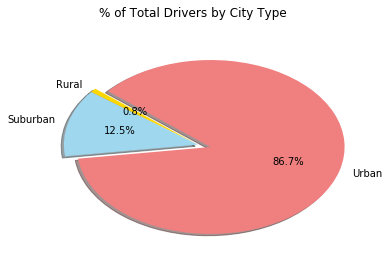

In [22]:
# Calculate Driver Percents
all_data.head()

type_driver_group = all_data.groupby('type')
driver_sum = pd.DataFrame(type_driver_group['driver_count'].sum())
driver_sum.head()


driver_labels = driver_sum.index.values.tolist()
driver_sizes = driver_sum['driver_count'].tolist()
driver_colors = ["gold", "#9fd7ef", "lightcoral"]
driver_explode = (0, 0, 0.1)

plt.pie(driver_sizes, explode=driver_explode, labels=driver_labels, colors=driver_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.suptitle('% of Total Drivers by City Type')

plt.savefig('pie-drivers-city-type.png', bbox_inches='tight')

plt.show()

# Build Pie Chart

# Save Figure

# Build Pie Charts

# Save Figure